In [63]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [76]:
x, y = make_classification(n_samples = 200, n_features = 10, n_informative= 8, random_state= 123, n_classes= 2)


In [77]:
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9
0,1.072662,-0.025180,2.039490,6.987663,-0.994942,-4.666231,-1.305667,-3.229949,1.261343,-1.357878
1,-1.034861,2.745424,2.524558,5.187755,1.798288,-3.331549,0.179398,-5.037283,-1.520349,-0.267093
2,-0.262778,-0.959441,-0.720918,-4.921131,3.999838,4.306461,-1.930580,4.566675,-2.035988,-1.356747
3,-0.260763,0.690369,1.338698,-3.172155,1.470751,2.261115,2.193554,-0.674542,-0.306816,2.727255
4,-3.335322,-2.195076,2.409516,2.834552,1.363204,-2.637000,1.557034,-5.424169,-0.848868,-0.072923
...,...,...,...,...,...,...,...,...,...,...
195,-0.161707,0.718671,1.186081,-0.531795,0.937112,1.848333,1.649165,0.687942,-0.369239,-1.106829
196,6.326934,2.793732,0.802476,-5.603039,2.506428,3.796124,1.371808,4.098986,-1.365940,0.278965
197,-2.693617,-0.364149,2.428559,7.483534,2.015234,-3.376025,-1.758395,-3.185240,0.677932,-1.781809
198,3.841559,0.834111,-0.567003,-6.869366,2.334352,3.500315,1.700409,3.247603,-1.414955,1.295988


In [78]:
y

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1])

In [79]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X,y)

In [80]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, Train, Target):
    self.Train = Train
    self.Target = Target
  def __len__(self):
    return self.Train.shape[0]
  def __getitem__(self,idx):
    Train = self.Train.iloc[idx].values
    Target = self.Target[idx]
    Train = torch.from_numpy(Train)
    Target = torch.tensor(Target)
    return Train, Target



In [81]:
type(Train_x)


pandas.core.frame.DataFrame

In [82]:
Dataset(Train_x,Train_y).__getitem__(1)

(tensor([-0.7652, -2.9693,  1.2529, -2.3138, -1.0607,  0.5799,  2.8984, -1.8642,
         -0.0206,  0.5722], dtype=torch.float64),
 tensor(0))

In [83]:
Train_y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [84]:
train_dl = torch.utils.data.DataLoader(Dataset(Train_x, Train_y), batch_size = 120, shuffle = True, num_workers = 2, pin_memory = False)
test_dl = torch.utils.data.DataLoader(Dataset(Test_x, Test_y),  batch_size = 120, shuffle = True, num_workers = 2, pin_memory = False )


In [86]:
for data, target in train_dl:
  print(data[0].shape)

torch.Size([10])
torch.Size([10])


In [87]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.layer1 = nn.Linear(10,20)
    self.layer2 = nn.Linear(20, 1)
    self.Relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    output1 = self.layer1(x)
    output2 = self.Relu(output1)
    output3 = self.layer2(output2)
    output4 = self.Relu(output3)
    output5 = self.sigmoid(output4)
    return output5


In [88]:
model = NN()

In [89]:
for data, target in train_dl:
  print(target.shape)


torch.Size([120])
torch.Size([30])


In [94]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [95]:
num_epochs = 100
train_losses = []
test_losses = []
for epoch in range(num_epochs):
  train_epoch_loss = 0
  test_epoch_loss = 0
  for data, target in train_dl:
    data = data.to(torch.float32)
    target = target[...,None].to(torch.float32)
    output = model(data)
    loss = loss_fn(output, target)
    train_epoch_loss +=loss.detach().numpy()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  with torch.no_grad():
    for data, target in test_dl:
      output = model(data.to(torch.float32))
      loss = loss_fn(output, target[...,None].to(torch.float32))
      test_epoch_loss += loss.detach().numpy()
    train_losses.append(train_epoch_loss)
    test_losses.append(test_epoch_loss)


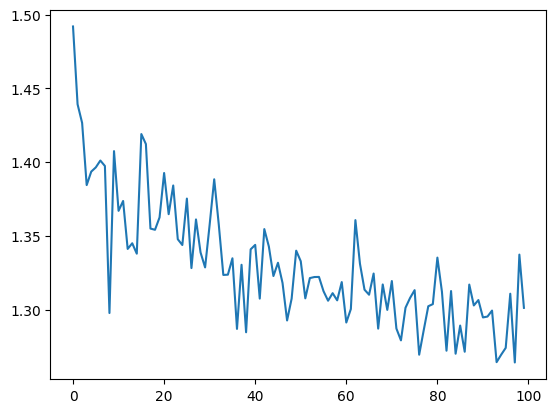

In [96]:
plt.plot(train_losses)

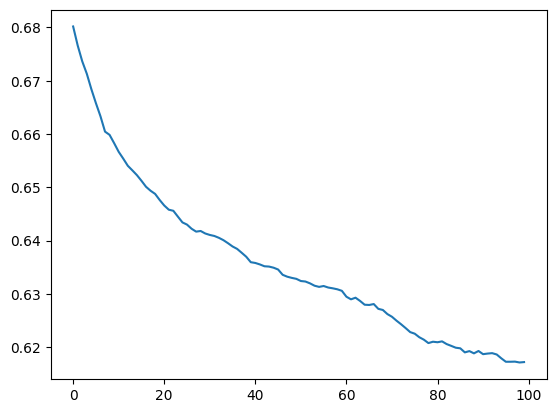

In [97]:
plt.plot(test_losses)